In [5]:
dups = ['../out/duplicates_correlation_g%d.tsv' % x
        for x in range(4)]

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
# other imports
import numpy as np
import pandas as pd
import statsmodels.stats.multitest as sm

In [6]:
rs = [pd.read_table(x)
      for x in dups]

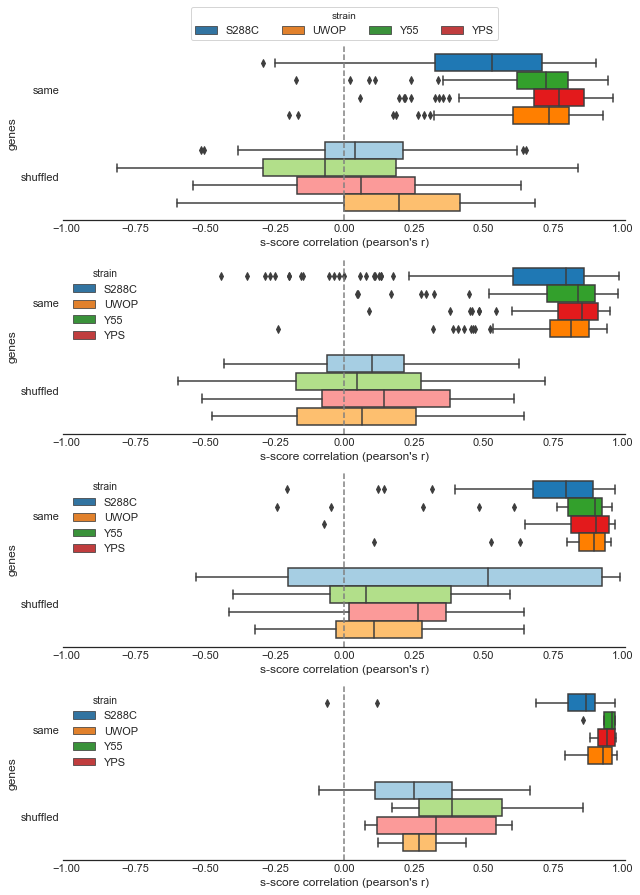

In [9]:
plt.figure(figsize=(9, 12))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)

    ax = sns.boxplot(data=r,
                     x='corr-score',
                     y='genes',
                     hue='strain',
                     hue_order=['S288C',
                                'UWOP',
                                'Y55',
                                'YPS'])

    colors = sns.color_palette("Paired", 8)
    for b1, b2, c in zip(range(4),
                         range(4, 8),
                         range(0, 8, 2)):
        ax.artists[b1].set_facecolor(colors[c+1])
        ax.artists[b2].set_facecolor(colors[c])

    plt.xlim(-1.01, 1.01)
    plt.xlabel('s-score correlation (pearson\'s r)')
    plt.axvline(0, 
                linestyle='dashed',
                color='grey')

    if i == 0:
        plt.legend(frameon=True,
                   title='strain',
                   ncol=4,
                   bbox_to_anchor=(0.5, 1),
                   loc='lower center')

sns.despine(left=True)
plt.tight_layout();

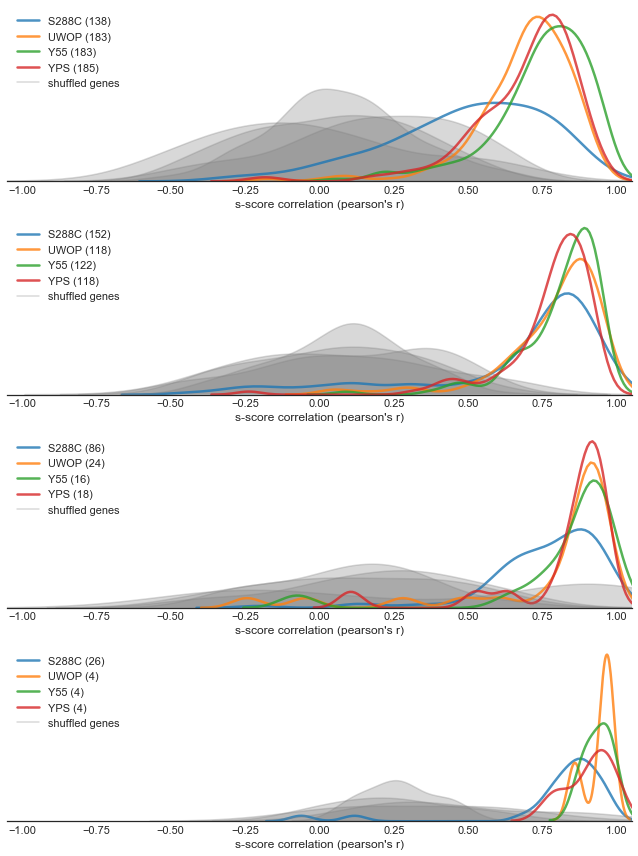

In [10]:
plt.figure(figsize=(9, 12))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)

    for strain in ['S288C',
                   'UWOP',
                   'Y55',
                   'YPS']:
        sns.kdeplot(r[(r['strain'] == strain) &
                      (r['genes'] == 'same')]['corr-score'],
                    label=strain + ' (%d)' % r.groupby(['strain', 'genes']).count().loc[(strain,
                                                                                         'same'),
                                                                                        'gene'],
                    lw=2.5,
                    alpha=0.8)
        if strain == 'YPS':
            label = 'shuffled genes'
        else:
            label = '_'
        sns.kdeplot(r[(r['strain'] == strain) &
                      (r['genes'] == 'shuffled')]['corr-score'],
                    label=label,
                    color='grey',
                    shade=True,
                    alpha=0.3)

    plt.xlim(-1.05, 1.05)
    plt.xlabel('s-score correlation (pearson\'s r)')

    plt.ylabel('')
    plt.yticks([])

sns.despine(left=True)
plt.tight_layout();

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>